     time   200   160   128  102.4  81.92  65.536  52.4288  41.94304  \
0       0    92    70    54     54     43      43       38        39   
1       1    90    72    56     56     49      44       42        48   
2       2    86    71    59     56     46      44       47        44   
3       3    88    66    61     60     47      45       44        37   
4       4    79    67    59     52     50      48       49        39   
..    ...   ...   ...   ...    ...    ...     ...      ...       ...   
995   995  9667  7947  7984   7947   8378    7387     7259      5732   
996   996  9857  8080  8081   8086   8522    7570     7501      5897   
997   997  9746  7915  8029   7939   8458    7369     7285      5650   
998   998  9744  7950  7935   7907   8423    7504     7443      5725   
999   999  9687  8089  7943   7969   8397    7366     7142      5671   

     33.554432  26.8435456  21.47483648  17.179869184  
0           47          48           43            45  
1           42         

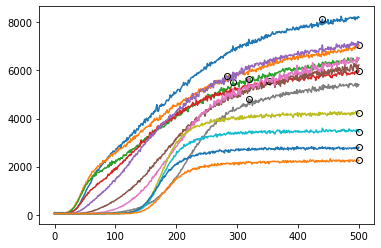

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

whichday='1'

#construct=['D262N']
#construct=['D262V']
construct=['WT']

df=pd.read_table('/project/fava/work/kiersten.ruff/Collaborations/Mittag/2023/ThT_fitting/For_Kiersten/Revised_Eq_Data/Datasets for fitting/Day '+whichday+'/'+construct[0]+'_data.txt')

print(df)

stconcs=list(df.columns.values)

maxtimebyconc=[]
maxslopebyconc=[]
for i in range(1,len(stconcs)):
    currthtall=df[stconcs[i]].tolist()
    currtimeall=df['time'].tolist()
    currtime=currtimeall[0:501]
    currtht=currthtall[0:501]
    binsz=10
    getslope=[]
    for j in range(0,len(currtht)-binsz):
        getslope.append((currtht[j+binsz]-currtht[j])/(currtime[j+binsz]-currtime[j]))
    pos = [i for i,x in enumerate(getslope) if x<-20]
    maxslopebyconc.append(max(getslope))
    
    plt.plot(currtime,currtht)
    if pos:
        maxtimebyconc.append(currtime[pos[0]])
        plt.plot(currtime[pos[0]],currtht[pos[0]],'o',color='black',fillstyle='none')

    else:
        maxtimebyconc.append(currtime[j+binsz])
        plt.plot(currtime[j+binsz],currtht[j+binsz],'o',color='black',fillstyle='none')
    
    #print(stconcs[i])
    #print(getslope)
    
print(maxtimebyconc)
print(maxslopebyconc)

# Paramater by Conc - WT

[-2.0511581900652964]


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


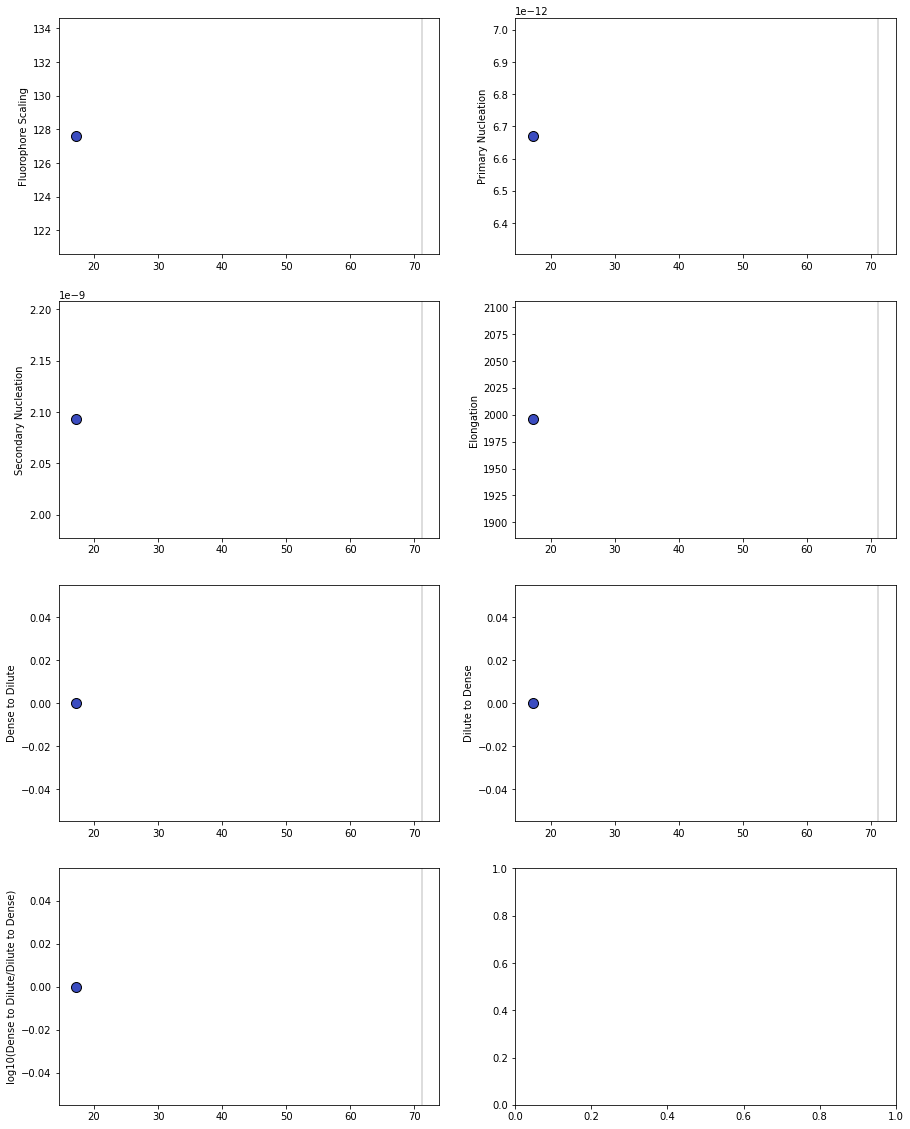

In [4]:
import math

csat_wt = 71.2

conc=[17.179869184]#, 21.47483648, 26.8435456, 33.554432, 41.9430, 52.4288, 65.536, 81.92, 102.4, 128, 160, 200]
conc2=[17]#, 21, 26, 33, 41, 52, 65, 81, 102, 128, 160, 200]

supersatwt=[]
for c in range(0,len(conc)):
    supersatwt.append(math.log2(conc[c]/csat_wt))
    
print(supersatwt)

dendilwt=[]
dildenwt=[]
fib1wt=[]
fib2wt=[]
fiblongwt=[]
fscalwt=[]
for c in range(0,len(conc2)):
    with open('best_guess_WT_'+str(conc2[c])+'_Day_'+whichday+'.txt') as myfile:
        for line in myfile:
            line = line.strip()
            line = line.split(",")
            dendilwt.append(float(line[0]))
            dildenwt.append(float(line[1]))
            fib1wt.append(float(line[2]))
            fib2wt.append(float(line[3]))
            fiblongwt.append(float(line[4]))
            fscalwt.append(float(line[10]))

ddratwt=[]
for i in range(0,len(conc)):
    if dildenwt[i]!=0:
        ddratwt.append(math.log10(dendilwt[i]/dildenwt[i]))
    else:
        ddratwt.append(math.log10(1))


msize=100
fig, axs = plt.subplots(4, 2, figsize=(15, 20))
#axs[0,0].plot(conc,fscalwt,'o',markersize=msize)
axs[0,0].scatter(conc, fscalwt, s=msize, c=supersatwt, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2)
axs[0,0].axvline(x=csat_wt,color='lightgrey')
axs[0,0].set_ylabel('Fluorophore Scaling')

#axs[0,1].plot(conc,fib1wt,'o',markersize=msize)
axs[0,1].scatter(conc, fib1wt, s=msize, c=supersatwt, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2)
axs[0,1].axvline(x=csat_wt,color='lightgrey')
axs[0,1].set_ylabel('Primary Nucleation')

#axs[1,0].plot(conc,fib2wt,'o',markersize=msize)
axs[1,0].scatter(conc, fib2wt, s=msize, c=supersatwt, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2)
axs[1,0].axvline(x=csat_wt,color='lightgrey')
axs[1,0].set_ylabel('Secondary Nucleation')

#axs[1,1].plot(conc,fiblongwt,'o',markersize=msize)
axs[1,1].scatter(conc, fiblongwt, s=msize, c=supersatwt, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2)
axs[1,1].axvline(x=csat_wt,color='lightgrey')
axs[1,1].set_ylabel('Elongation')

#axs[2,0].plot(conc,dendilwt,'o',markersize=msize)
axs[2,0].scatter(conc, dendilwt, s=msize, c=supersatwt, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2)
axs[2,0].axvline(x=csat_wt,color='lightgrey')
axs[2,0].set_ylabel('Dense to Dilute')

#axs[2,1].plot(conc,dildenwt,'o',markersize=msize)
axs[2,1].scatter(conc, dildenwt, s=msize, c=supersatwt, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2)
axs[2,1].axvline(x=csat_wt,color='lightgrey')
axs[2,1].set_ylabel('Dilute to Dense')

#axs[3,0].plot(conc,ddratwt,'o',markersize=msize)
axs[3,0].scatter(conc, ddratwt, s=msize, c=supersatwt, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2)
axs[3,0].axvline(x=csat_wt,color='lightgrey')
axs[3,0].set_ylabel('log10(Dense to Dilute/Dilute to Dense)')

plt.rcParams['pdf.fonttype'] = 42 # Makes text editiable
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
#plt.savefig('WT_Day_2_fitted_parameters_500_max_text_files.pdf', transparent=True, bbox_inches = "tight") 


# Parameter by Concentration D262V

[-2.7478522677443813, -2.425924172857019, -2.103996077969657, -1.7820679830822943, -1.460141264056795, -1.1382117933075695, -0.8162836984202073, -0.4943556035328448, -0.17242750864548256, 0.14950058624187984, 0.4714286811292421, 0.7933567760166044]


Text(0, 0.5, 'log10(Dense to Dilute/Dilute to Dense)')

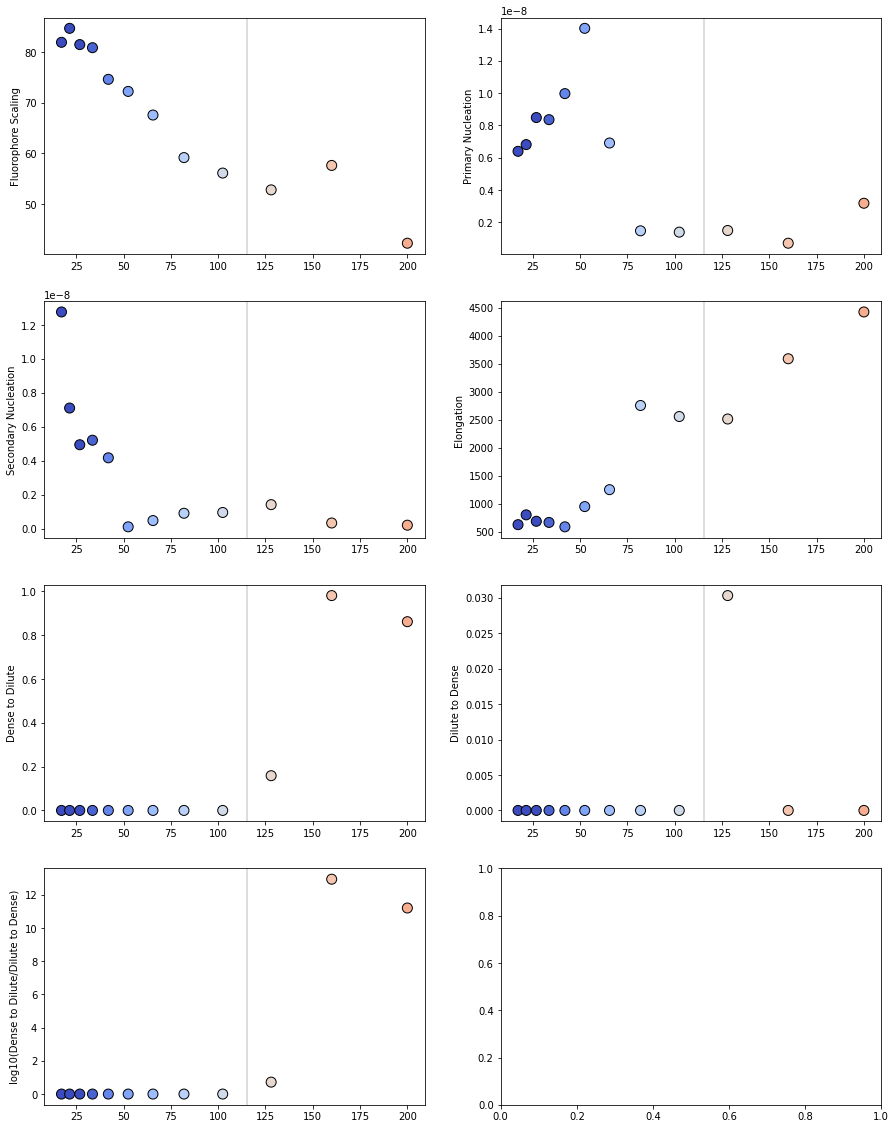

In [101]:
import math

csat_d262v = 115.4

conc=[17.179869184, 21.47483648, 26.8435456, 33.554432, 41.9430, 52.4288, 65.536, 81.92, 102.4, 128, 160, 200]
conc2=[17, 21, 26, 33, 41, 52, 65, 81, 102, 128, 160, 200]

supersatd262v=[]
for c in range(0,len(conc)):
    supersatd262v.append(math.log2(conc[c]/csat_d262v))
    
print(supersatd262v)

dendild262v=[]
dildend262v=[]
fib1d262v=[]
fib2d262v=[]
fiblongd262v=[]
fscald262v=[]
for c in range(0,len(conc2)):
    with open('best_guess_D262V_'+str(conc2[c])+'_Day_'+whichday+'.txt') as myfile:
        for line in myfile:
            line = line.strip()
            line = line.split(",")
            dendild262v.append(float(line[0]))
            dildend262v.append(float(line[1]))
            fib1d262v.append(float(line[2]))
            fib2d262v.append(float(line[3]))
            fiblongd262v.append(float(line[4]))
            fscald262v.append(float(line[10]))

ddratd262v=[]
for i in range(0,len(conc)):
    if dildend262v[i]!=0:
        ddratd262v.append(math.log10(dendild262v[i]/dildend262v[i]))
    else:
        ddratd262v.append(math.log10(1))


msize=100
fig, axs = plt.subplots(4, 2, figsize=(15, 20))
#axs[0,0].plot(conc,fscald262v,'o',markersize=msize)
axs[0,0].scatter(conc, fscald262v, s=msize, c=supersatd262v, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2)
axs[0,0].axvline(x=csat_d262v,color='lightgrey')
axs[0,0].set_ylabel('Fluorophore Scaling')

#axs[0,1].plot(conc,fib1d262v,'o',markersize=msize)
axs[0,1].scatter(conc, fib1d262v, s=msize, c=supersatd262v, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2)
axs[0,1].axvline(x=csat_d262v,color='lightgrey')
axs[0,1].set_ylabel('Primary Nucleation')

#axs[1,0].plot(conc,fib2d262v,'o',markersize=msize)
axs[1,0].scatter(conc, fib2d262v, s=msize, c=supersatd262v, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2)
axs[1,0].axvline(x=csat_d262v,color='lightgrey')
axs[1,0].set_ylabel('Secondary Nucleation')

#axs[1,1].plot(conc,fiblongd262v,'o',markersize=msize)
axs[1,1].scatter(conc, fiblongd262v, s=msize, c=supersatd262v, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2)
axs[1,1].axvline(x=csat_d262v,color='lightgrey')
axs[1,1].set_ylabel('Elongation')

#axs[2,0].plot(conc,dendild262v,'o',markersize=msize)
axs[2,0].scatter(conc, dendild262v, s=msize, c=supersatd262v, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2)
axs[2,0].axvline(x=csat_d262v,color='lightgrey')
axs[2,0].set_ylabel('Dense to Dilute')

#axs[2,1].plot(conc,dildend262v,'o',markersize=msize)
axs[2,1].scatter(conc, dildend262v, s=msize, c=supersatd262v, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2)
axs[2,1].axvline(x=csat_d262v,color='lightgrey')
axs[2,1].set_ylabel('Dilute to Dense')

#axs[3,0].plot(conc,ddratd262v,'o',markersize=msize)
axs[3,0].scatter(conc, ddratd262v, s=msize, c=supersatd262v, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2)
axs[3,0].axvline(x=csat_d262v,color='lightgrey')
axs[3,0].set_ylabel('log10(Dense to Dilute/Dilute to Dense)')

#plt.rcParams['pdf.fonttype'] = 42 # Makes text editiable
#plt.rcParams['ps.fonttype'] = 42
#plt.rcParams['font.sans-serif'] = "Arial"
#plt.rcParams['font.family'] = "sans-serif"
#plt.savefig('D262V_Day_2_fitted_parameters_500_max.pdf', transparent=True, bbox_inches = "tight") 


# Parameter by Concentration D262N

[-2.8185987425718495, -2.4966706476844873, -2.174742552797125, -1.852814457909763, -1.5308877388842634, -1.208958268135038, -0.8870301732476757, -0.5651020783603132, -0.24317398347295088, 0.0787541114144113, 0.4006822063017738, 0.722610301189136]


Text(0, 0.5, 'log10(Dense to Dilute/Dilute to Dense)')

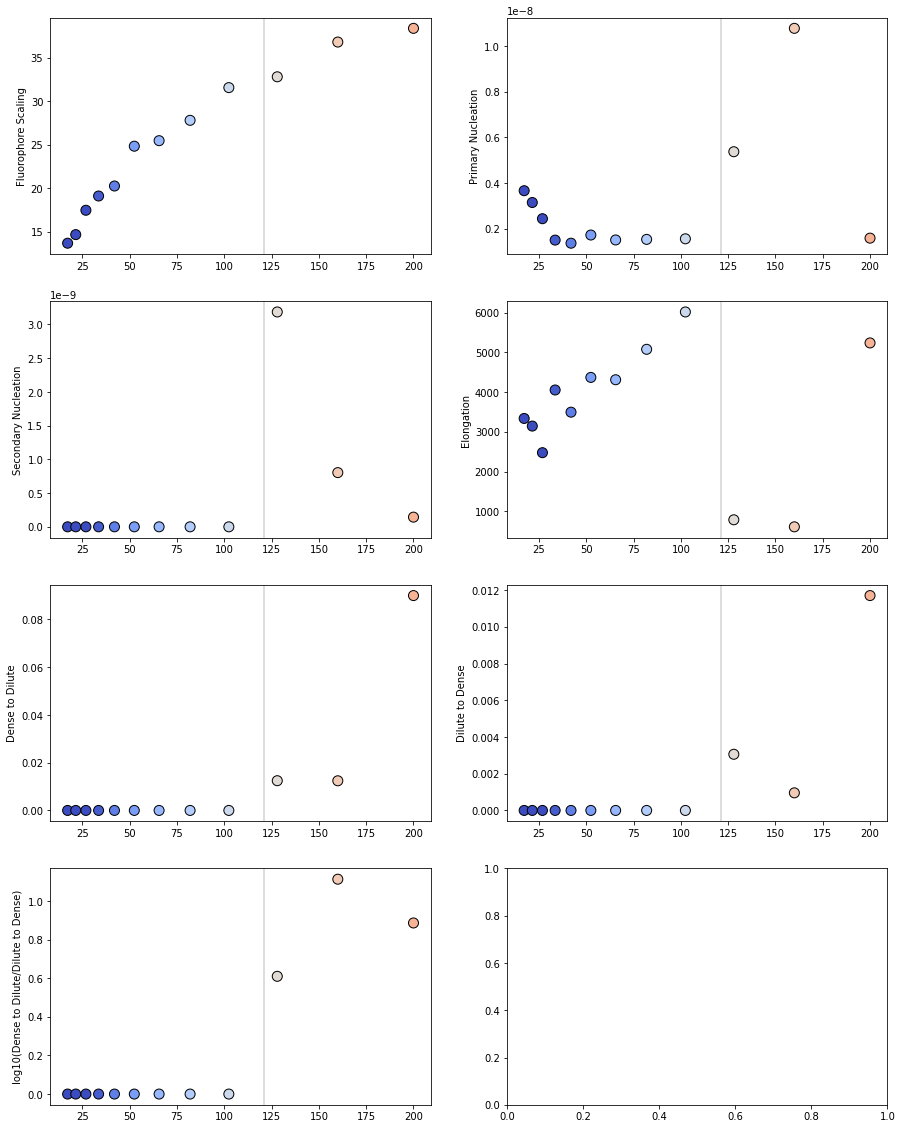

In [102]:
import math

csat_d262n = 121.2

conc=[17.179869184, 21.47483648, 26.8435456, 33.554432, 41.9430, 52.4288, 65.536, 81.92, 102.4, 128, 160, 200]
conc2=[17, 21, 26, 33, 41, 52, 65, 81, 102, 128, 160, 200]

supersatd262n=[]
for c in range(0,len(conc)):
    supersatd262n.append(math.log2(conc[c]/csat_d262n))
    
print(supersatd262n)

dendild262n=[]
dildend262n=[]
fib1d262n=[]
fib2d262n=[]
fiblongd262n=[]
fscald262n=[]
for c in range(0,len(conc2)):
    with open('best_guess_D262N_'+str(conc2[c])+'_Day_'+whichday+'.txt') as myfile:
        for line in myfile:
            line = line.strip()
            line = line.split(",")
            dendild262n.append(float(line[0]))
            dildend262n.append(float(line[1]))
            fib1d262n.append(float(line[2]))
            fib2d262n.append(float(line[3]))
            fiblongd262n.append(float(line[4]))
            fscald262n.append(float(line[10]))

ddratd262n=[]
for i in range(0,len(conc)):
    if dildend262n[i]!=0:
        ddratd262n.append(math.log10(dendild262n[i]/dildend262n[i]))
    else:
        ddratd262n.append(math.log10(1))


msize=100
fig, axs = plt.subplots(4, 2, figsize=(15, 20))
#axs[0,0].plot(conc,fscald262n,'o',markersize=msize)
axs[0,0].scatter(conc, fscald262n, s=msize, c=supersatd262n, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2)
axs[0,0].axvline(x=csat_d262n,color='lightgrey')
axs[0,0].set_ylabel('Fluorophore Scaling')

#axs[0,1].plot(conc,fib1d262n,'o',markersize=msize)
axs[0,1].scatter(conc, fib1d262n, s=msize, c=supersatd262n, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2)
axs[0,1].axvline(x=csat_d262n,color='lightgrey')
axs[0,1].set_ylabel('Primary Nucleation')

#axs[1,0].plot(conc,fib2d262n,'o',markersize=msize)
axs[1,0].scatter(conc, fib2d262n, s=msize, c=supersatd262n, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2)
axs[1,0].axvline(x=csat_d262n,color='lightgrey')
axs[1,0].set_ylabel('Secondary Nucleation')

#axs[1,1].plot(conc,fiblongd262n,'o',markersize=msize)
axs[1,1].scatter(conc, fiblongd262n, s=msize, c=supersatd262n, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2)
axs[1,1].axvline(x=csat_d262n,color='lightgrey')
axs[1,1].set_ylabel('Elongation')

#axs[2,0].plot(conc,dendild262n,'o',markersize=msize)
axs[2,0].scatter(conc, dendild262n, s=msize, c=supersatd262n, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2)
axs[2,0].axvline(x=csat_d262n,color='lightgrey')
axs[2,0].set_ylabel('Dense to Dilute')

#axs[2,1].plot(conc,dildend262n,'o',markersize=msize)
axs[2,1].scatter(conc, dildend262n, s=msize, c=supersatd262n, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2)
axs[2,1].axvline(x=csat_d262n,color='lightgrey')
axs[2,1].set_ylabel('Dilute to Dense')

#axs[3,0].plot(conc,ddratd262n,'o',markersize=msize)
axs[3,0].scatter(conc, ddratd262n, s=msize, c=supersatd262n, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2)
axs[3,0].axvline(x=csat_d262n,color='lightgrey')
axs[3,0].set_ylabel('log10(Dense to Dilute/Dilute to Dense)')

#plt.rcParams['pdf.fonttype'] = 42 # Makes text editiable
#plt.rcParams['ps.fonttype'] = 42
#plt.rcParams['font.sans-serif'] = "Arial"
#plt.rcParams['font.family'] = "sans-serif"
#plt.savefig('D262N_Day_2_fitted_parameters_500_max.pdf', transparent=True, bbox_inches = "tight") 


# Compare different constructs

Text(0, 0.5, 'log10(Dense to Dilute/Dilute to Dense)')

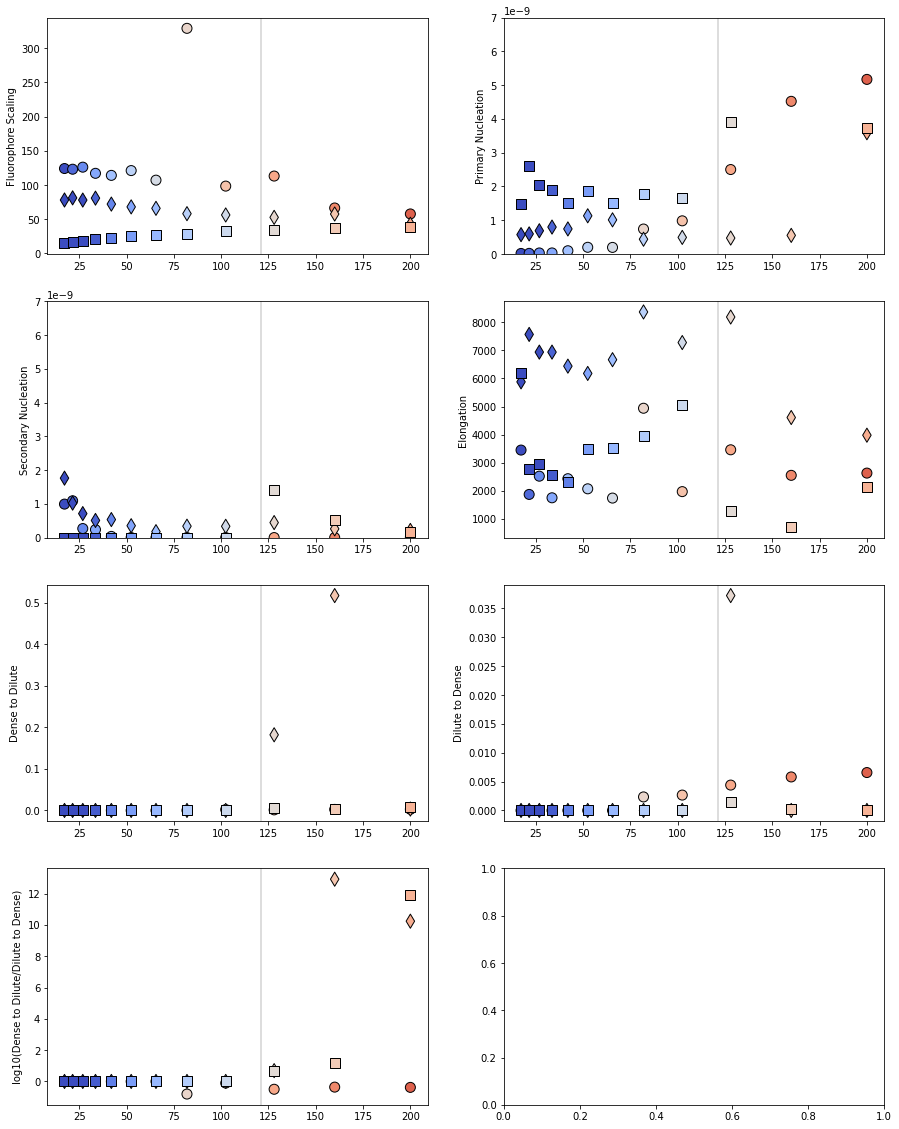

In [21]:
conc=[17.179869184, 21.47483648, 26.8435456, 33.554432, 41.9430, 52.4288, 65.536, 81.92, 102.4, 128, 160, 200]


msize=100
fig, axs = plt.subplots(4, 2, figsize=(15, 20))
axs[0,0].scatter(conc, fscalwt, s=msize, c=supersatwt, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2)
axs[0,0].scatter(conc, fscald262v, s=msize, c=supersatd262v, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2, marker='d')
axs[0,0].scatter(conc, fscald262n, s=msize, c=supersatd262n, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2, marker='s')
axs[0,0].axvline(x=csat_d262n,color='lightgrey')
axs[0,0].set_ylabel('Fluorophore Scaling')

axs[0,1].scatter(conc, fib1wt, s=msize, c=supersatwt, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2)
axs[0,1].scatter(conc, fib1d262v, s=msize, c=supersatd262v, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2, marker='d')
axs[0,1].scatter(conc, fib1d262n, s=msize, c=supersatd262n, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2, marker='s')
axs[0,1].axvline(x=csat_d262n,color='lightgrey')
axs[0,1].set_ylabel('Primary Nucleation')
axs[0,1].set_ylim([0, 7*10**-9])

axs[1,0].scatter(conc, fib2wt, s=msize, c=supersatwt, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2)
axs[1,0].scatter(conc, fib2d262v, s=msize, c=supersatd262v, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2, marker='d')
axs[1,0].scatter(conc, fib2d262n, s=msize, c=supersatd262n, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2, marker='s')
axs[1,0].axvline(x=csat_d262n,color='lightgrey')
axs[1,0].set_ylabel('Secondary Nucleation')
axs[1,0].set_ylim([0, 7*10**-9])

axs[1,1].scatter(conc, fiblongwt, s=msize, c=supersatwt, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2)
axs[1,1].scatter(conc, fiblongd262v, s=msize, c=supersatd262v, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2, marker='d')
axs[1,1].scatter(conc, fiblongd262n, s=msize, c=supersatd262n, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2, marker='s')
axs[1,1].axvline(x=csat_d262n,color='lightgrey')
axs[1,1].set_ylabel('Elongation')

axs[2,0].scatter(conc, dendilwt, s=msize, c=supersatwt, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2)
axs[2,0].scatter(conc, dendild262v, s=msize, c=supersatd262v, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2, marker='d')
axs[2,0].scatter(conc, dendild262n, s=msize, c=supersatd262n, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2, marker='s')
axs[2,0].axvline(x=csat_d262n,color='lightgrey')
axs[2,0].set_ylabel('Dense to Dilute')

axs[2,1].scatter(conc, dildenwt, s=msize, c=supersatwt, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2)
axs[2,1].scatter(conc, dildend262v, s=msize, c=supersatd262v, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2, marker='d')
axs[2,1].scatter(conc, dildend262n, s=msize, c=supersatd262n, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2, marker='s')
axs[2,1].axvline(x=csat_d262n,color='lightgrey')
axs[2,1].set_ylabel('Dilute to Dense')

axs[3,0].scatter(conc, ddratwt, s=msize, c=supersatwt, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2)
axs[3,0].scatter(conc, ddratd262v, s=msize, c=supersatd262v, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2, marker='d')
axs[3,0].scatter(conc, ddratd262n, s=msize, c=supersatd262n, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2, marker='s')
axs[3,0].axvline(x=csat_d262n,color='lightgrey')
axs[3,0].set_ylabel('log10(Dense to Dilute/Dilute to Dense)')

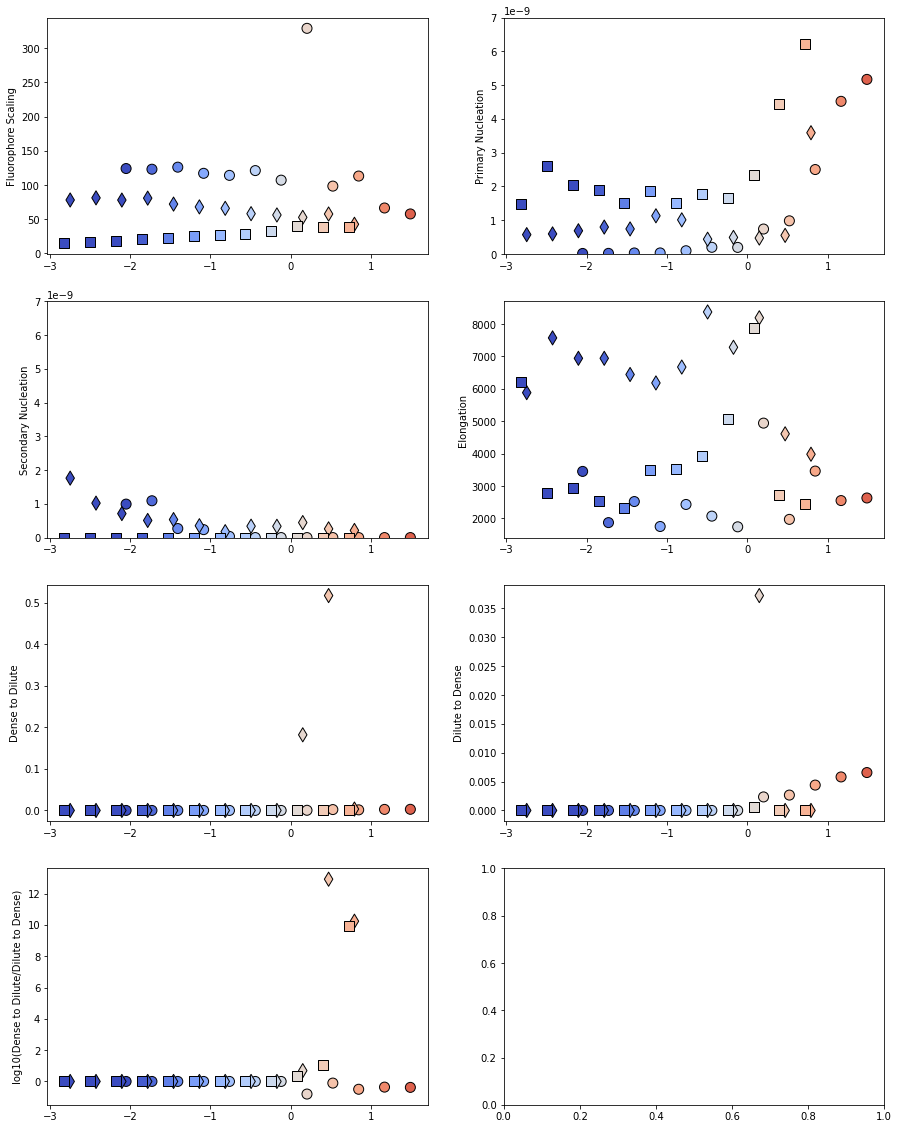

In [43]:
conc=[17.179869184, 21.47483648, 26.8435456, 33.554432, 41.9430, 52.4288, 65.536, 81.92, 102.4, 128, 160, 200]


msize=100
fig, axs = plt.subplots(4, 2, figsize=(15, 20))
axs[0,0].scatter(supersatwt, fscalwt, s=msize, c=supersatwt, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2)
axs[0,0].scatter(supersatd262v, fscald262v, s=msize, c=supersatd262v, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2, marker='d')
axs[0,0].scatter(supersatd262n, fscald262n, s=msize, c=supersatd262n, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2, marker='s')
axs[0,0].set_ylabel('Fluorophore Scaling')

axs[0,1].scatter(supersatwt, fib1wt, s=msize, c=supersatwt, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2)
#axs[0,1].plot(supersatwt, fib1wt)
axs[0,1].scatter(supersatd262v, fib1d262v, s=msize, c=supersatd262v, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2, marker='d')
axs[0,1].scatter(supersatd262n, fib1d262n, s=msize, c=supersatd262n, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2, marker='s')
axs[0,1].set_ylabel('Primary Nucleation')
axs[0,1].set_ylim([0, 7*10**-9])

axs[1,0].scatter(supersatwt, fib2wt, s=msize, c=supersatwt, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2)
axs[1,0].scatter(supersatd262v, fib2d262v, s=msize, c=supersatd262v, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2, marker='d')
axs[1,0].scatter(supersatd262n, fib2d262n, s=msize, c=supersatd262n, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2, marker='s')
axs[1,0].set_ylabel('Secondary Nucleation')
axs[1,0].set_ylim([0, 7*10**-9])

axs[1,1].scatter(supersatwt, fiblongwt, s=msize, c=supersatwt, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2)
axs[1,1].scatter(supersatd262v, fiblongd262v, s=msize, c=supersatd262v, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2, marker='d')
axs[1,1].scatter(supersatd262n, fiblongd262n, s=msize, c=supersatd262n, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2, marker='s')
axs[1,1].set_ylabel('Elongation')

axs[2,0].scatter(supersatwt, dendilwt, s=msize, c=supersatwt, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2)
axs[2,0].scatter(supersatd262v, dendild262v, s=msize, c=supersatd262v, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2, marker='d')
axs[2,0].scatter(supersatd262n, dendild262n, s=msize, c=supersatd262n, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2, marker='s')
axs[2,0].set_ylabel('Dense to Dilute')

axs[2,1].scatter(supersatwt, dildenwt, s=msize, c=supersatwt, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2)
axs[2,1].scatter(supersatd262v, dildend262v, s=msize, c=supersatd262v, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2, marker='d')
axs[2,1].scatter(supersatd262n, dildend262n, s=msize, c=supersatd262n, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2, marker='s')
axs[2,1].set_ylabel('Dilute to Dense')

axs[3,0].scatter(supersatwt, ddratwt, s=msize, c=supersatwt, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2)
axs[3,0].scatter(supersatd262v, ddratd262v, s=msize, c=supersatd262v, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2, marker='d')
axs[3,0].scatter(supersatd262n, ddratd262n, s=msize, c=supersatd262n, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2, marker='s')
axs[3,0].set_ylabel('log10(Dense to Dilute/Dilute to Dense)')

#plt.savefig('All_constructs_Day_2_fitted_parameters_by_supersat.pdf', transparent=True, bbox_inches = "tight") 


# Plot each data vertically

Text(0, 0.5, 'log10(Dense to Dilute/Dilute to Dense)')

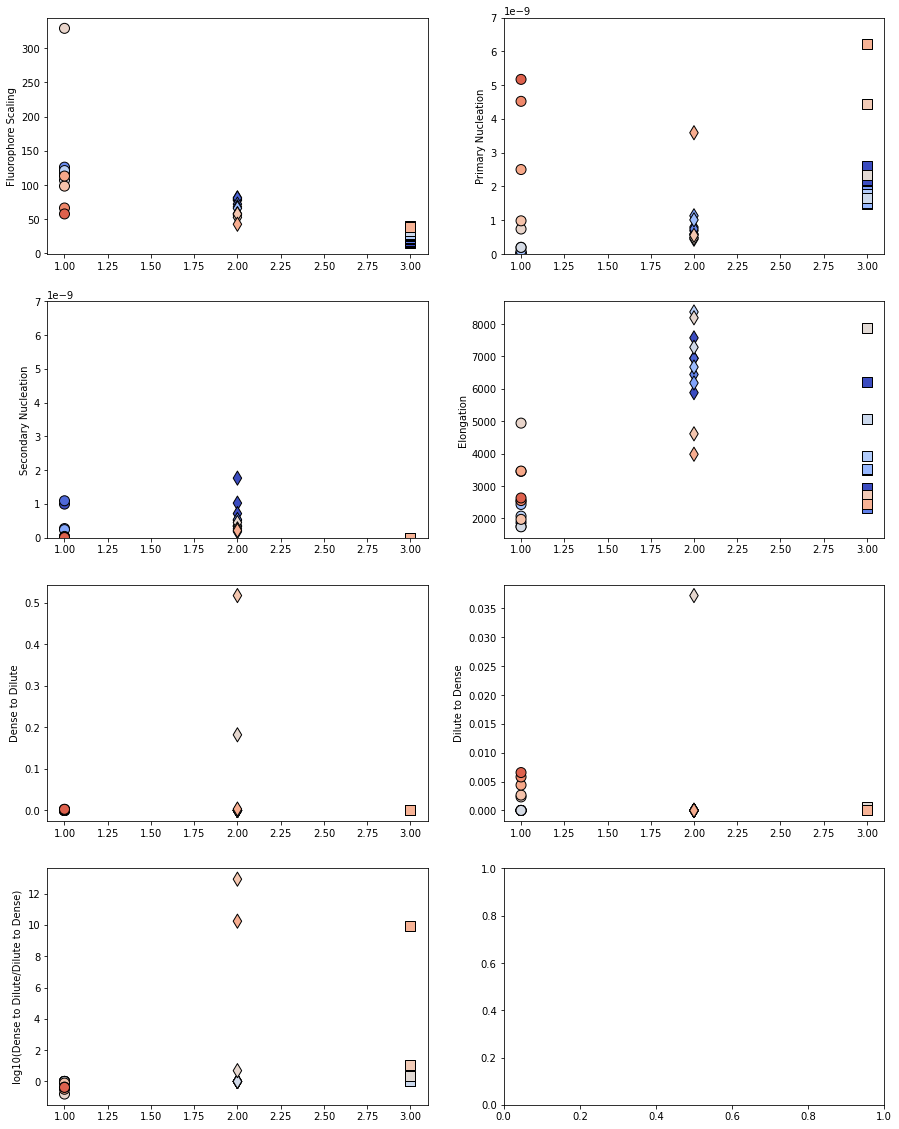

In [11]:
conc=[17.179869184, 21.47483648, 26.8435456, 33.554432, 41.9430, 52.4288, 65.536, 81.92, 102.4, 128, 160, 200]
concwt=[1] * len(conc)
conc262v=[2] * len(conc)
conc262n=[3] * len(conc)

msize=100
fig, axs = plt.subplots(4, 2, figsize=(15, 20))
axs[0,0].scatter(concwt, fscalwt, s=msize, c=supersatwt, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2)
axs[0,0].scatter(conc262v, fscald262v, s=msize, c=supersatd262v, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2, marker='d')
axs[0,0].scatter(conc262n, fscald262n, s=msize, c=supersatd262n, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2, marker='s')
#axs[0,0].axvline(x=csat_d262n,color='lightgrey')
axs[0,0].set_ylabel('Fluorophore Scaling')

axs[0,1].scatter(concwt, fib1wt, s=msize, c=supersatwt, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2)
axs[0,1].scatter(conc262v, fib1d262v, s=msize, c=supersatd262v, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2, marker='d')
axs[0,1].scatter(conc262n, fib1d262n, s=msize, c=supersatd262n, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2, marker='s')
#axs[0,1].axvline(x=csat_d262n,color='lightgrey')
axs[0,1].set_ylabel('Primary Nucleation')
axs[0,1].set_ylim([0, 7*10**-9])

axs[1,0].scatter(concwt, fib2wt, s=msize, c=supersatwt, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2)
axs[1,0].scatter(conc262v, fib2d262v, s=msize, c=supersatd262v, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2, marker='d')
axs[1,0].scatter(conc262n, fib2d262n, s=msize, c=supersatd262n, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2, marker='s')
#axs[1,0].axvline(x=csat_d262n,color='lightgrey')
axs[1,0].set_ylabel('Secondary Nucleation')
axs[1,0].set_ylim([0, 7*10**-9])

axs[1,1].scatter(concwt, fiblongwt, s=msize, c=supersatwt, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2)
axs[1,1].scatter(conc262v, fiblongd262v, s=msize, c=supersatd262v, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2, marker='d')
axs[1,1].scatter(conc262n, fiblongd262n, s=msize, c=supersatd262n, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2, marker='s')
#axs[1,1].axvline(x=csat_d262n,color='lightgrey')
axs[1,1].set_ylabel('Elongation')

axs[2,0].scatter(concwt, dendilwt, s=msize, c=supersatwt, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2)
axs[2,0].scatter(conc262v, dendild262v, s=msize, c=supersatd262v, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2, marker='d')
axs[2,0].scatter(conc262n, dendild262n, s=msize, c=supersatd262n, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2, marker='s')
#axs[2,0].axvline(x=csat_d262n,color='lightgrey')
axs[2,0].set_ylabel('Dense to Dilute')

axs[2,1].scatter(concwt, dildenwt, s=msize, c=supersatwt, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2)
axs[2,1].scatter(conc262v, dildend262v, s=msize, c=supersatd262v, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2, marker='d')
axs[2,1].scatter(conc262n, dildend262n, s=msize, c=supersatd262n, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2, marker='s')
#axs[2,1].axvline(x=csat_d262n,color='lightgrey')
axs[2,1].set_ylabel('Dilute to Dense')

axs[3,0].scatter(concwt, ddratwt, s=msize, c=supersatwt, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2)
axs[3,0].scatter(conc262v, ddratd262v, s=msize, c=supersatd262v, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2, marker='d')
axs[3,0].scatter(conc262n, ddratd262n, s=msize, c=supersatd262n, cmap='coolwarm',edgecolors='black',vmin=-2, vmax=2, marker='s')
#axs[3,0].axvline(x=csat_d262n,color='lightgrey')
axs[3,0].set_ylabel('log10(Dense to Dilute/Dilute to Dense)')

# Connect points

(0.0, 1.7)

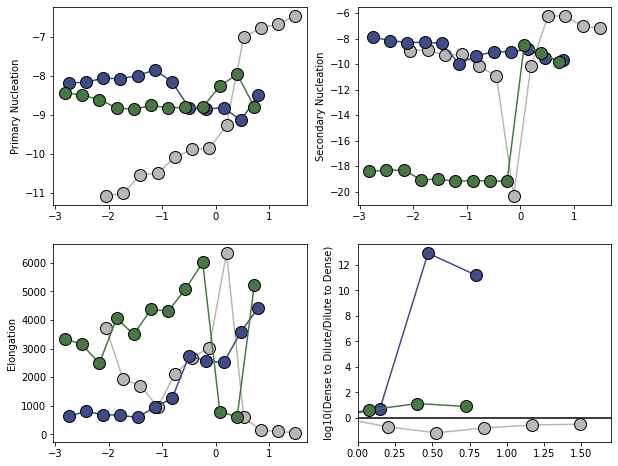

In [103]:
import numpy as np

conc=[17.179869184, 21.47483648, 26.8435456, 33.554432, 41.9430, 52.4288, 65.536, 81.92, 102.4, 128, 160, 200]


fig, axs = plt.subplots(2, 2, figsize=(10, 8))

axs[0,0].plot(supersatwt, np.log10(fib1wt), '-o', color='#b8b7b3',markersize=12, markeredgecolor='black')
axs[0,0].plot(supersatd262v, np.log10(fib1d262v), '-o', color='#3e4c8a',markersize=12, markeredgecolor='black')
axs[0,0].plot(supersatd262n, np.log10(fib1d262n), '-o', color='#477743',markersize=12, markeredgecolor='black')
axs[0,0].set_ylabel('Primary Nucleation')
#axs[0,1].set_ylim([0, 7*10**-9])

axs[0,1].plot(supersatwt, np.log10(fib2wt), '-o', color='#b8b7b3',markersize=12, markeredgecolor='black')
axs[0,1].plot(supersatd262v, np.log10(fib2d262v), '-o', color='#3e4c8a',markersize=12, markeredgecolor='black')
axs[0,1].plot(supersatd262n, np.log10(fib2d262n), '-o', color='#477743',markersize=12, markeredgecolor='black')
axs[0,1].set_ylabel('Secondary Nucleation')
#axs[0,1].set_ylim([0, 7*10**-9])

axs[1,0].plot(supersatwt, fiblongwt, '-o', color='#b8b7b3',markersize=12, markeredgecolor='black')
axs[1,0].plot(supersatd262v, fiblongd262v, '-o', color='#3e4c8a',markersize=12, markeredgecolor='black')
axs[1,0].plot(supersatd262n, fiblongd262n, '-o', color='#477743',markersize=12, markeredgecolor='black')
axs[1,0].set_ylabel('Elongation')
#axs[1,0].set_ylim([0, 7*10**-9])

axs[1,1].plot(supersatwt, ddratwt, '-o', color='#b8b7b3',markersize=12, markeredgecolor='black')
axs[1,1].plot(supersatd262v, ddratd262v, '-o', color='#3e4c8a',markersize=12, markeredgecolor='black')
axs[1,1].plot(supersatd262n, ddratd262n, '-o', color='#477743',markersize=12, markeredgecolor='black')
axs[1,1].set_ylabel('log10(Dense to Dilute/Dilute to Dense)')
axs[1,1].axhline(y=0,color='black')
axs[1,1].set_xlim([0, 1.7])

#plt.savefig('All_constructs_Day_2_fitted_parameters_by_supersat_single_color.pdf', transparent=True, bbox_inches = "tight") 
#plt.savefig('All_constructs_Day_2_fitted_parameters_by_supersat_single_color_primary_secondary.pdf', transparent=True, bbox_inches = "tight") 


# Plot specific fits

[17, 21, 26, 33, 41, 52, 65, 81, 102, 128, 160, 200]
[-2.0511581900652964, -1.729230095177934, -1.407302000290572, -1.0853739054032097, -0.7634471863777104, -0.44151771562848474, -0.1195896207411224, 0.20233847414623973, 0.5242665690336021, 0.8461946639209645, 1.1681227588083267, 1.4900508536956891]
[-2.7478522677443813, -2.425924172857019, -2.103996077969657, -1.7820679830822943, -1.460141264056795, -1.1382117933075695, -0.8162836984202073, -0.4943556035328448, -0.17242750864548256, 0.14950058624187984, 0.4714286811292421, 0.7933567760166044]
[-2.8185987425718495, -2.4966706476844873, -2.174742552797125, -1.852814457909763, -1.5308877388842634, -1.208958268135038, -0.8870301732476757, -0.5651020783603132, -0.24317398347295088, 0.0787541114144113, 0.4006822063017738, 0.722610301189136]


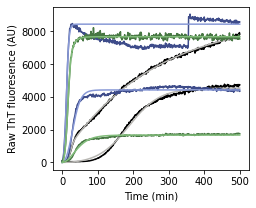

In [109]:
import pandas as pd

# Use similar degrees of supersaturation
datatypebelow=['41_Day_2','65_Day_2','65_Day_2'] #~-0.8
datatypeabove=['128_Day_2','200_Day_2','200_Day_2'] #~0.8
mycolors=['#000000','#3e4c8a','#477743']
mycolors2=['#b8b7b3','#8798d6','#81bc7a']
construct=['WT','D262V','D262N']

print(conc2)
print(supersatwt)
print(supersatd262v)
print(supersatd262n)

plt.figure(figsize=(3.5,3))

for c in range(0,len(construct)):
    dfexp=pd.read_table('exp_fibril_'+construct[c]+'_'+datatypebelow[c]+'.txt', header=None)
    dfcomp=pd.read_table('comp_fibril_'+construct[c]+'_'+datatypebelow[c]+'.txt', header=None)

    explist=dfexp[0].tolist()
    tmp=dfcomp[0].tolist()
    complist=tmp[0:len(explist)]

    plt.plot(explist,'-',color=mycolors[c])
    plt.plot(complist,'-',color=mycolors2[c])
    
    dfexp=pd.read_table('exp_fibril_'+construct[c]+'_'+datatypeabove[c]+'.txt', header=None)
    dfcomp=pd.read_table('comp_fibril_'+construct[c]+'_'+datatypeabove[c]+'.txt', header=None)

    explist=dfexp[0].tolist()
    tmp=dfcomp[0].tolist()
    complist=tmp[0:len(explist)]

    plt.plot(explist,'-',color=mycolors[c])
    plt.plot(complist,'-',color=mycolors2[c])

#plt.xlim([0, 350])
plt.ylabel('Raw ThT fluoresence (AU)')
plt.xlabel('Time (min)')

plt.rcParams['pdf.fonttype'] = 42 # Makes text editiable
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
#plt.savefig('All_constructs_Day_2_plot_fits_08_500_max_text_files.pdf', transparent=True, bbox_inches = "tight") 


# 4 Panel row of data of fit values for manuscript

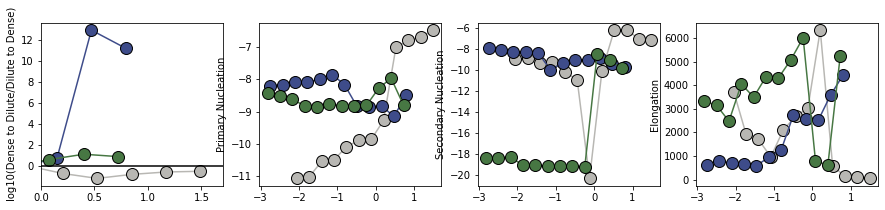

In [106]:
import numpy as np

conc=[17.179869184, 21.47483648, 26.8435456, 33.554432, 41.9430, 52.4288, 65.536, 81.92, 102.4, 128, 160, 200]


fig, axs = plt.subplots(1, 4, figsize=(15, 3))

axs[1].plot(supersatwt, np.log10(fib1wt), '-o', color='#b8b7b3',markersize=12, markeredgecolor='black')
axs[1].plot(supersatd262v, np.log10(fib1d262v), '-o', color='#3e4c8a',markersize=12, markeredgecolor='black')
axs[1].plot(supersatd262n, np.log10(fib1d262n), '-o', color='#477743',markersize=12, markeredgecolor='black')
axs[1].set_ylabel('Primary Nucleation')
#axs[1].set_ylim([0, 7*10**-9])

axs[2].plot(supersatwt, np.log10(fib2wt), '-o', color='#b8b7b3',markersize=12, markeredgecolor='black')
axs[2].plot(supersatd262v, np.log10(fib2d262v), '-o', color='#3e4c8a',markersize=12, markeredgecolor='black')
axs[2].plot(supersatd262n, np.log10(fib2d262n), '-o', color='#477743',markersize=12, markeredgecolor='black')
axs[2].set_ylabel('Secondary Nucleation')
#axs[2].set_ylim([0, 7*10**-9])

axs[3].plot(supersatwt, fiblongwt, '-o', color='#b8b7b3',markersize=12, markeredgecolor='black')
axs[3].plot(supersatd262v, fiblongd262v, '-o', color='#3e4c8a',markersize=12, markeredgecolor='black')
axs[3].plot(supersatd262n, fiblongd262n, '-o', color='#477743',markersize=12, markeredgecolor='black')
axs[3].set_ylabel('Elongation')
#axs[3,0].set_ylim([0, 7*10**-9])

axs[0].plot(supersatwt, ddratwt, '-o', color='#b8b7b3',markersize=12, markeredgecolor='black')
axs[0].plot(supersatd262v, ddratd262v, '-o', color='#3e4c8a',markersize=12, markeredgecolor='black')
axs[0].plot(supersatd262n, ddratd262n, '-o', color='#477743',markersize=12, markeredgecolor='black')
axs[0].set_ylabel('log10(Dense to Dilute/Dilute to Dense)')
axs[0].axhline(y=0,color='black')
axs[0].set_xlim([0, 1.7])

plt.rcParams['pdf.fonttype'] = 42 # Makes text editiable
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
#plt.savefig('All_constructs_Day_2_fitted_parameters_rat_fib1_fib2_elong_500_max_text_files.pdf', transparent=True, bbox_inches = "tight") 


# 4 panel data plot for manuscript

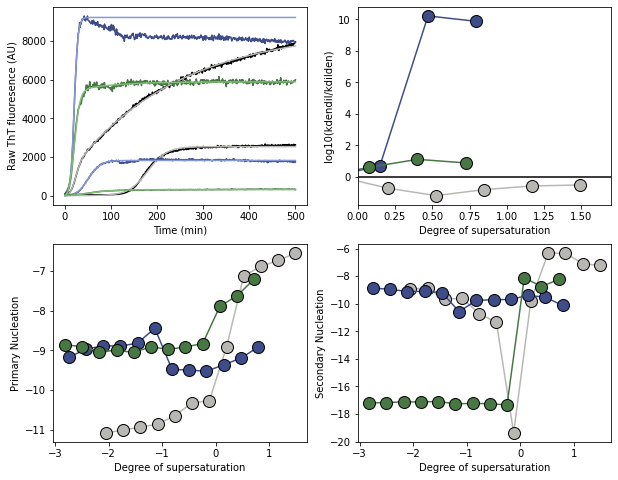

In [9]:
import pandas as pd

conc=[17.179869184, 21.47483648, 26.8435456, 33.554432, 41.9430, 52.4288, 65.536, 81.92, 102.4, 128, 160, 200]


fig, axs = plt.subplots(2, 2, figsize=(10, 8))

datatypebelow=['41_Day_2','65_Day_2','65_Day_2'] #~-0.8
datatypeabove=['128_Day_2','200_Day_2','200_Day_2'] #~0.8
mycolors=['#000000','#3e4c8a','#477743']
mycolors2=['#b8b7b3','#8798d6','#81bc7a']
construct=['WT','D262V','D262N']

for c in range(0,len(construct)):
    dfexp=pd.read_table('exp_fibril_'+construct[c]+'_'+datatypebelow[c]+'.txt', header=None)
    dfcomp=pd.read_table('comp_fibril_'+construct[c]+'_'+datatypebelow[c]+'.txt', header=None)

    explist=dfexp[0].tolist()
    tmp=dfcomp[0].tolist()
    complist=tmp[0:len(explist)]

    axs[0,0].plot(explist,'-',color=mycolors[c])
    axs[0,0].plot(complist,'-',color=mycolors2[c])
    
    dfexp=pd.read_table('exp_fibril_'+construct[c]+'_'+datatypeabove[c]+'.txt', header=None)
    dfcomp=pd.read_table('comp_fibril_'+construct[c]+'_'+datatypeabove[c]+'.txt', header=None)

    explist=dfexp[0].tolist()
    tmp=dfcomp[0].tolist()
    complist=tmp[0:len(explist)]

    axs[0,0].plot(explist,'-',color=mycolors[c])
    axs[0,0].plot(complist,'-',color=mycolors2[c])

axs[0,0].set_ylabel('Raw ThT fluoresence (AU)')
axs[0,0].set_xlabel('Time (min)')
           
axs[0,1].plot(supersatwt, ddratwt, '-o', color='#b8b7b3',markersize=12, markeredgecolor='black')
axs[0,1].plot(supersatd262v, ddratd262v, '-o', color='#3e4c8a',markersize=12, markeredgecolor='black')
axs[0,1].plot(supersatd262n, ddratd262n, '-o', color='#477743',markersize=12, markeredgecolor='black')
axs[0,1].set_ylabel('log10(kdendil/kdilden)')
axs[0,1].set_xlabel('Degree of supersaturation')
axs[0,1].axhline(y=0,color='black')
axs[0,1].set_xlim([0, 1.7])

axs[1,0].plot(supersatwt, np.log10(fib1wt), '-o', color='#b8b7b3',markersize=12, markeredgecolor='black')
axs[1,0].plot(supersatd262v, np.log10(fib1d262v), '-o', color='#3e4c8a',markersize=12, markeredgecolor='black')
axs[1,0].plot(supersatd262n, np.log10(fib1d262n), '-o', color='#477743',markersize=12, markeredgecolor='black')
axs[1,0].set_ylabel('Primary Nucleation')
axs[1,0].set_xlabel('Degree of supersaturation')
#axs[1,0].set_ylim([-20, -5])

axs[1,1].plot(supersatwt, np.log10(fib2wt), '-o', color='#b8b7b3',markersize=12, markeredgecolor='black')
axs[1,1].plot(supersatd262v, np.log10(fib2d262v), '-o', color='#3e4c8a',markersize=12, markeredgecolor='black')
axs[1,1].plot(supersatd262n, np.log10(fib2d262n), '-o', color='#477743',markersize=12, markeredgecolor='black')
axs[1,1].set_ylabel('Secondary Nucleation')
axs[1,1].set_xlabel('Degree of supersaturation')
#axs[1,1].set_ylim([-20, -5])

plt.rcParams['pdf.fonttype'] = 42 # Makes text editiable
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
#plt.savefig('All_constructs_Day_2_fitted_parameters_exp_fits_rat_fib1_fib2_500_max.pdf', transparent=True, bbox_inches = "tight") 
#plt.savefig('All_constructs_Day_2_fitted_parameters_exp_fits_rat_fib1_fib2_prim_equal_sec.pdf', transparent=True, bbox_inches = "tight") 


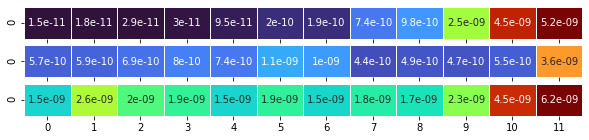

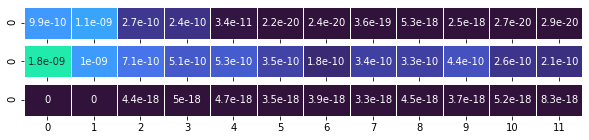

In [29]:
import seaborn as sbn
import numpy as np

f,(ax1,ax2,ax3) = plt.subplots(3,1,sharex=True,figsize = (10, 2))
g1 = sbn.heatmap(np.asarray(fib1wt).reshape(1,len(conc)),cmap='turbo',cbar=False,ax=ax1,vmin=1e-11, vmax=5e-9, square=False, linewidth=.5, annot=True)
g2 = sbn.heatmap(np.asarray(fib1d262v).reshape(1,len(conc)),cmap='turbo',cbar=False,ax=ax2,vmin=1e-11, vmax=5e-9, square=False, linewidth=.5, annot=True)
g3 = sbn.heatmap(np.asarray(fib1d262n).reshape(1,len(conc)),cmap='turbo',cbar=False,ax=ax3,vmin=1e-11, vmax=5e-9, square=False, linewidth=.5, annot=True)


f,(ax1,ax2,ax3) = plt.subplots(3,1,sharex=True,figsize = (10, 2))
g1 = sbn.heatmap(np.asarray(fib2wt).reshape(1,len(conc)),cmap='turbo',cbar=False,ax=ax1,vmin=1e-11, vmax=5e-9, square=False, linewidth=.5, annot=True)
g2 = sbn.heatmap(np.asarray(fib2d262v).reshape(1,len(conc)),cmap='turbo',cbar=False,ax=ax2,vmin=1e-11, vmax=5e-9, square=False, linewidth=.5, annot=True)
g3 = sbn.heatmap(np.asarray(fib2d262n).reshape(1,len(conc)),cmap='turbo',cbar=False,ax=ax3,vmin=1e-11, vmax=5e-9, square=False, linewidth=.5, annot=True)


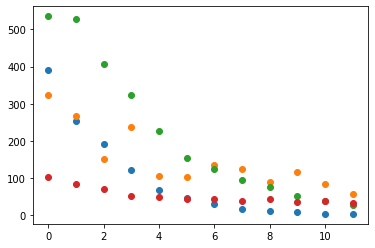

In [13]:
sloped262n2=[390.9, 253.5, 192.8, 121.5, 67.6, 46.7, 30.8, 16.7, 11.0, 8.1, 4.9, 4.2]

sloped262n1=[324.5, 267.4, 151.6, 237.0, 106.2, 102.8, 135.4, 126.0, 90.1, 116.1, 84.3, 57.4]

sloped262v2=[535.3, 527.4, 406.9, 323.3, 226.3, 153.5, 125.9, 95.6, 75.7, 51.8, 39.2, 27.8]

slopewt2=[102.6, 85.9, 71.2, 53.4, 48.6, 44.2, 45.0, 38.1, 43.4, 36.0, 38.2, 33.0]

plt.plot(sloped262n2,'o')
plt.plot(sloped262n1,'o')
plt.plot(sloped262v2,'o')
plt.plot(slopewt2,'o')